In [5]:
import os
os.chdir("/Users/gres1/Downloads/Datasets-3/Capstone 2/Part 2")
os.getcwd()


'/Users/gres1/Downloads/Datasets-3/Capstone 2/Part 2'

In [8]:
import pandas as pd

user = pd.read_csv("user.csv")
rating = pd.read_csv("tourism_rating.csv")
places = pd.read_excel("tourism_with_id.xlsx")

user.head()


,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [9]:
print("Users:", user.shape)
print(user.info())
print(user.isnull().sum())
print("="*50)

print("Ratings:", rating.shape)
print(rating.info())
print(rating.isnull().sum())
print("="*50)

print("Places:", places.shape)
print(places.info())
print(places.isnull().sum())


Users: (300, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None
User_Id     0
Location    0
Age         0
dtype: int64
Ratings: (10000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64
Places: (437, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   

In [10]:
user.head(), rating.head(), places.head()


(   User_Id                   Location  Age
 0        1      Semarang, Jawa Tengah   20
 1        2         Bekasi, Jawa Barat   21
 2        3        Cirebon, Jawa Barat   23
 3        4         Bekasi, Jawa Barat   21
 4        5  Lampung, Sumatera Selatan   20,
    User_Id  Place_Id  Place_Ratings
 0        1       179              3
 1        1       344              2
 2        1         5              5
 3        1       373              3
 4        1       101              4,
    Place_Id                         Place_Name  \
 0         1                   Monumen Nasional   
 1         2                           Kota Tua   
 2         3                      Dunia Fantasi   
 3         4  Taman Mini Indonesia Indah (TMII)   
 4         5           Atlantis Water Adventure   
 
                                          Description       Category     City  \
 0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
 1  Kota tua di Jakarta, yang juga bernama

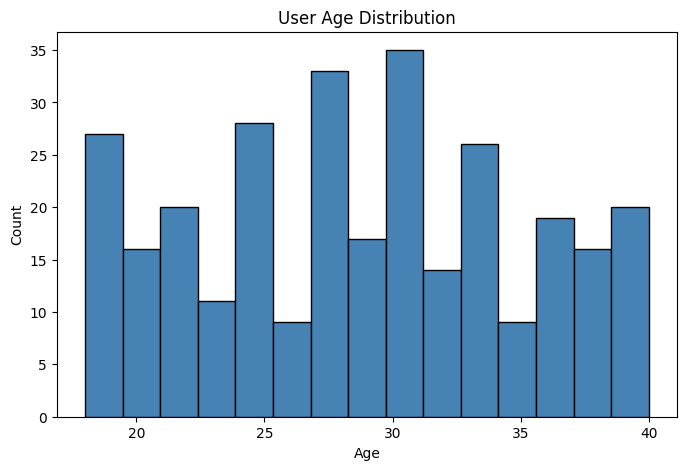

count    300.000000
mean      28.700000
std        6.393716
min       18.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       40.000000
Name: Age, dtype: float64

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(user['Age'], bins=15, color='steelblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("User Age Distribution")
plt.show()

user['Age'].describe()


In [13]:
user['Location'].value_counts().head(10)


Location
Bekasi, Jawa Barat              39
Semarang, Jawa Tengah           22
Yogyakarta, DIY                 20
Lampung, Sumatera Selatan       20
Bogor, Jawa Barat               17
Jakarta Selatan, DKI Jakarta    14
Subang, Jawa Barat              14
Cirebon, Jawa Barat             14
Depok, Jawa Barat               12
Ponorogo, Jawa Timur            11
Name: count, dtype: int64

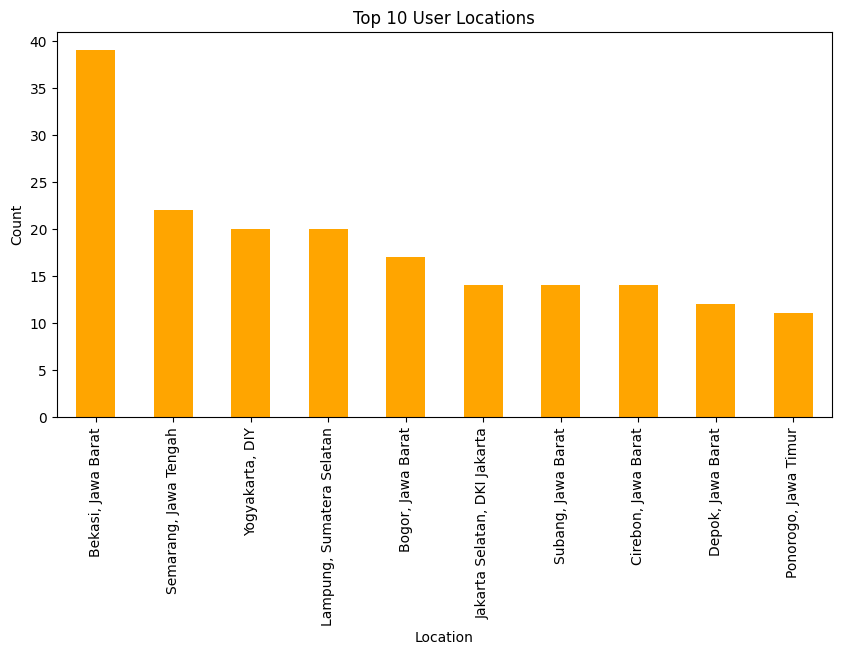

In [14]:
user['Location'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Top 10 User Locations")
plt.ylabel("Count")
plt.show()


In [15]:
places['Category'].value_counts()


Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64

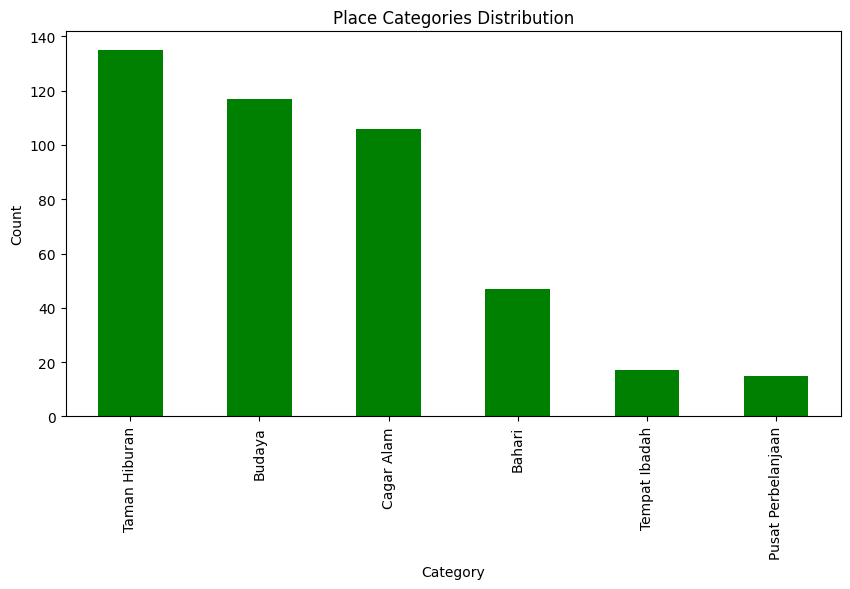

In [16]:
places['Category'].value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.title("Place Categories Distribution")
plt.ylabel("Count")
plt.show()


In [17]:
places['City'].value_counts()


City
Yogyakarta    126
Bandung       124
Jakarta        84
Semarang       57
Surabaya       46
Name: count, dtype: int64

In [18]:
merged = rating.merge(places, left_on='Place_Id', right_on='Place_Id')
merged.head()


,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
1,1,344,2,Pantai Marina,Pantai Marina (bahasa Jawa: Í¶•Í¶±Í¶∂Í¶±Í¶∂Í¶Ç...,Bahari,Semarang,3000,4.1,NaN,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329,NaN,344
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602,NaN,373
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,NaN,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151,NaN,101


In [19]:
merged.groupby('Place_Name')['Place_Ratings'].mean().sort_values(ascending=False).head(10)


Place_Name
Keraton Surabaya                         3.967742
Puncak Gunung Api Purba - Nglanggeran    3.882353
Kampung Cina                             3.842105
Teras Cikapundung BBWS                   3.789474
Monumen Yogya Kembali                    3.772727
Bukit Jamur                              3.766667
Bukit Bintang Yogyakarta                 3.764706
Monumen Nasional                         3.722222
Glamping Lakeside Rancabali              3.714286
Pantai Baron                             3.695652
Name: Place_Ratings, dtype: float64

In [20]:
# Create pivot table: rows = users, columns = places, values = ratings
pivot = merged.pivot_table(index='User_Id',
                           columns='Place_Name',
                           values='Place_Ratings')

# Compute similarity matrix between places
similarity = pivot.corr(method='pearson', min_periods=20)
similarity





Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
Place_Name,,,,,,,,,,,,,,,,,,,,,
Air Mancur Menari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Terjun Kali Pancur,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Terjun Kedung Pedut,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Terjun Semirang,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Terjun Sri Gethuk,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisata Kraton Jogja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Wisata Kuliner Pecenongan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Wisata Lereng Kelir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [21]:
def recommend(place_name, n=5):
    if place_name not in similarity:
        return "Place not found in the dataset."

    sim_scores = similarity[place_name].dropna().sort_values(ascending=False)
    return sim_scores.iloc[1:n+1]  # Top N excluding itself

recommend("Monumen Nasional", 5)


Series([], Name: Monumen Nasional, dtype: float64)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity


In [24]:
pivot_filled = pivot.fillna(0)

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(pivot_filled.T)

cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=pivot_filled.columns,
    columns=pivot_filled.columns
)

def recommend_cosine(place_name, n=5):
    if place_name not in cosine_sim_df.index:
        return "Place not found."
    
    sim_scores = cosine_sim_df[place_name].sort_values(ascending=False)
    return sim_scores.iloc[1:n+1]

recommend_cosine("Monumen Nasional", 5)


Place_Name
Wisata Mangrove Tapak       0.268835
Danau Rawa Pening           0.262729
Museum Sonobudoyo Unit I    0.260171
Dunia Fantasi               0.252406
Situ Patenggang             0.241168
Name: Monumen Nasional, dtype: float64

In [4]:
import os
os.chdir("/Users/gres1/Downloads/Datasets-3/Capstone 2/Part 2")
print(os.getcwd())


/Users/gres1/Downloads/Datasets-3/Capstone 2/Part 2
